In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import scipy.stats as ss

filepath = 'small_dataset_20.csv'


## Explorations sur un dataset représentatif de l'ensemble du jeu de donnée 

On teste nos données sur un plus petit jeu de données pour une question de difficulté à gérer le traitement d'un grand volume de donnée (environ 4go). Voici le code qui nous a servi pour générer notre nouveau dataset.

In [20]:
# a=[]
# for i in range(2018, 2024):
#   df = pd.read_csv('original_data/state_TX_'+str(i)+'.csv')
#   sampled_df = df.sample(frac=0.20, random_state=42)
#   a.append(sampled_df)
# final_df=pd.concat(a)
# final_df.to_csv('small_dataset_20.csv')

In [21]:
df = pd.read_csv(filepath)
print(f' the shape of the dataset is : {df.shape}')
df.head()

 the shape of the dataset is : (1776131, 99)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,5493004RLLKTQS8K7U51,19124,TX,48121.0,4.812102e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3674,22.02,77200,148.0,1180,1317,20
1,2018,OSTXQZDK5VDIPSIEIC53,23104,TX,48367.0,4.836714e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,8144,13.48,75000,183.0,2316,2689,14
2,2018,549300CB67L6KPJLHE19,46340,TX,48423.0,4.842300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,...,9.0,NaN,NaN,5238,24.91,64000,104.0,1657,2295,31
3,2018,549300LYRWPSYPK6S325,23104,TX,48439.0,4.843911e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5243,14.74,75000,177.0,1659,1930,28
4,2018,549300GKFNPRWNS0GF29,12420,TX,48453.0,4.845300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2264,37.59,86000,56.0,142,334,32


Pour une meilleure visibilité des différentes races, on renomme les différentes catégories

In [22]:
def rename_race_data(df):
    new_df = df.copy()
    new_df['derived_race'] = df['derived_race'].replace({
        'American Indian or Alaska Native' : "American Indian",
        'Black or African American': 'African American',
        '2 or more minority races' : "Other minorities",
        'Native Hawaiian or Other Pacific Islander': 'Others minorities',
        'Joint': 'Race Not Available',
        'Free Form Text Only': 'Race Not Available'  
    })
    return new_df

df = rename_race_data(df)

In [23]:
# Calculate the distribution of race
race_counts = df.groupby('derived_race')["derived_race"].count()
# Calculate the distribution of races according to approved loans
approved_counts = df[df['action_taken'] == 1]['derived_race'].value_counts()

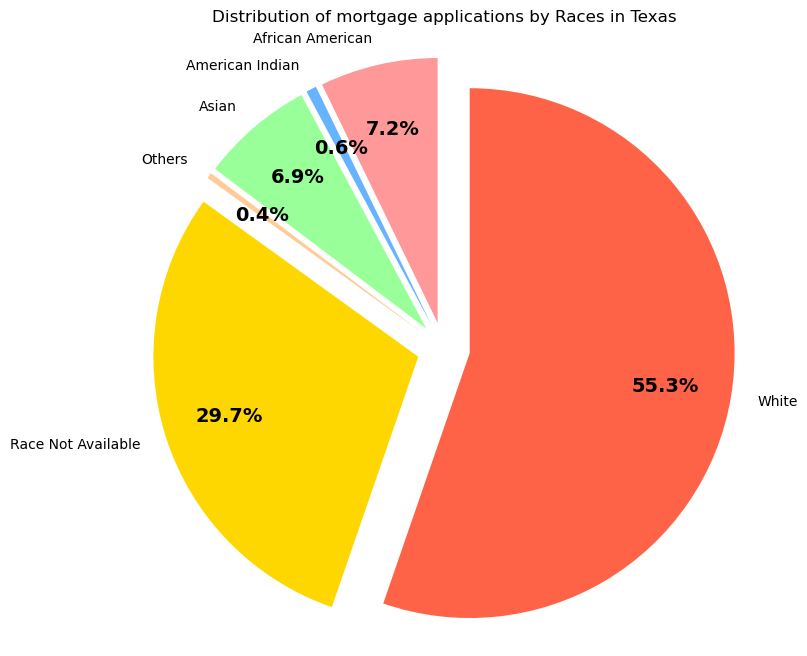

In [24]:
def create_pie_chart(race_counts, title):
    plt.figure(figsize=(8, 8))
    
    colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#8A2BE2'] 
    explode = [0.1] * len(race_counts) 
    
    wedges, texts, autotexts = plt.pie(
        race_counts,
        labels=race_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(race_counts)],  
        pctdistance=0.75,  
        labeldistance=1.1  
    )
    
    for text in autotexts:
        text.set_fontsize(14)
        text.set_color('black')  
        text.set_weight('bold')  
    
    plt.title(title)
    plt.axis('equal') 
    plt.show()

create_pie_chart(race_counts, title=f'Distribution of mortgage applications by Races in Texas')


Ce graphique représente la distribution des données selon la race. Les demandeurs sont majoritairement blancs avec une part de 55% des données. Les asiatiques et les afro-américains ont des pourcentages équivalents (7.2% et 6.9% respectivement), tandis que les autres races comme les amérindiens et les haïtiens représentent une très petite minorité dans notre dataset (moins de 1%).
Il est à noter que 29.7% des données qu’on possède ne mentionne aucune race, mais on estime qu’on a suffisamment de données (environ 6 millions de données).


In [25]:
def create_table_count(race_counts, coefficient):
    
    race_counts_df = race_counts.reset_index(name='Count')
    race_counts_df.columns = ['Race', 'Count']
    race_counts_df['Count'] = race_counts_df['Count'] * coefficient
    
    total_count = race_counts_df['Count'].sum() 
    race_counts_df['Percentage'] = round((race_counts_df['Count'] / total_count) * 100,2)
    race_counts_df['Percentage'] = race_counts_df['Percentage'].astype(str) + '%'


    print(tabulate(race_counts_df, headers='keys', tablefmt='fancy_grid'))
    pass

create_table_count(race_counts, coefficient=5)

╒════╤════════════════════╤═════════╤══════════════╕
│    │ Race               │   Count │ Percentage   │
╞════╪════════════════════╪═════════╪══════════════╡
│  0 │ African American   │  638215 │ 7.19%        │
├────┼────────────────────┼─────────┼──────────────┤
│  1 │ American Indian    │   56540 │ 0.64%        │
├────┼────────────────────┼─────────┼──────────────┤
│  2 │ Asian              │  610360 │ 6.87%        │
├────┼────────────────────┼─────────┼──────────────┤
│  3 │ Others             │   31210 │ 0.35%        │
├────┼────────────────────┼─────────┼──────────────┤
│  4 │ Race Not Available │ 2634065 │ 29.66%       │
├────┼────────────────────┼─────────┼──────────────┤
│  5 │ White              │ 4910265 │ 55.29%       │
╘════╧════════════════════╧═════════╧══════════════╛


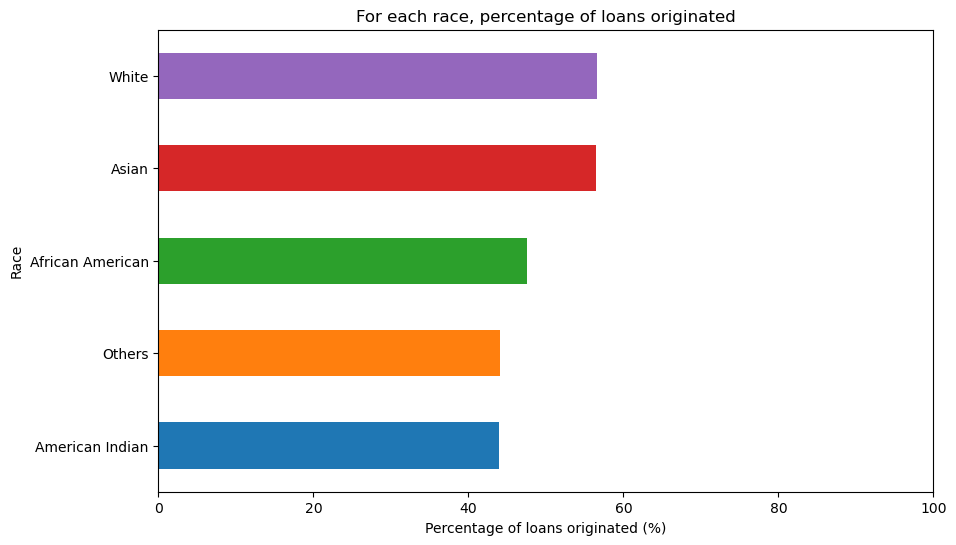

In [26]:
def create_bar_chart_loan_per_race(total_approved_counts, total_race_counts, title='between 2018 and 2023'):
  
  total_approved_counts = total_approved_counts.drop('Race Not Available')
  total_race_counts = total_race_counts.drop('Race Not Available')
  
  percentages = (total_approved_counts / total_race_counts) * 100

  plt.figure(figsize=(10, 6))
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
  percentages.sort_values().plot(kind='barh', color=colors)

  plt.xlabel('Percentage of loans originated (%)')
  plt.ylabel('Race')
  plt.title('For each race, percentage of loans originated')
  plt.xlim(0, 100)

  plt.show()
  pass

create_bar_chart_loan_per_race(approved_counts, race_counts)

# **Quelques variables explicatives de la décision**

In [27]:
#@title Analyse des Taux de Prêts Accordés et de Demandes Refusées par Type de Prêt

def plot_loan_action_analysis(file_path):
    # Charger les données
    state_TX = pd.read_csv(file_path, low_memory=False)

    # Remapper les valeurs de 'action_taken'
    action_mapping = {1: 'Loan originated', 3: 'Application denied'}
    state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

    # Remapper les valeurs de 'loan_purpose'
    loan_purpose_mapping = {
        1: 'Home purchase', 2: 'Home improvement',
        3: 'Refinancing', 4: 'Other purpose'
    }
    state_TX['loan_purpose_desc'] = state_TX['loan_purpose'].map(loan_purpose_mapping)

    # Filtrer les données pour les actions pertinentes
    filtered_data = state_TX[state_TX['action_taken_desc'].isin(['Loan originated', 'Application denied'])]

    # Calculer le pourcentage par loan_purpose
    loan_purpose_percentage = filtered_data.groupby(['loan_purpose_desc', 'action_taken_desc']).size().unstack(fill_value=0)
    loan_purpose_percentage = loan_purpose_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

    # Créer la figure et les axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graphique pour loan_purpose
    loan_purpose_bars = ax.barh(
        loan_purpose_percentage.index,
        loan_purpose_percentage['Loan originated'],
        color='#4CAF50',
        edgecolor='black',
        linewidth=1.5,
        label='Loan originated'
    )

    # Ajouter les barres pour les demandes refusées
    ax.barh(
        loan_purpose_percentage.index,
        loan_purpose_percentage['Application denied'],
        left=loan_purpose_percentage['Loan originated'],
        color='#F44336',
        edgecolor='black',
        linewidth=1.5,
        label='Application denied'
    )

    # Configurer le graphique
    ax.set_title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Type de Prêt', fontsize=16)
    ax.set_xlabel('Pourcentage (%)', fontsize=12)
    ax.set_ylabel('Type de Prêt', fontsize=12)
    ax.legend(title='Action Taken')
    plt.xlim(0, 100)  # Limiter l'axe des x à 100%

    # Afficher le graphique
    sns.despine()
    plt.tight_layout()
    plt.show()

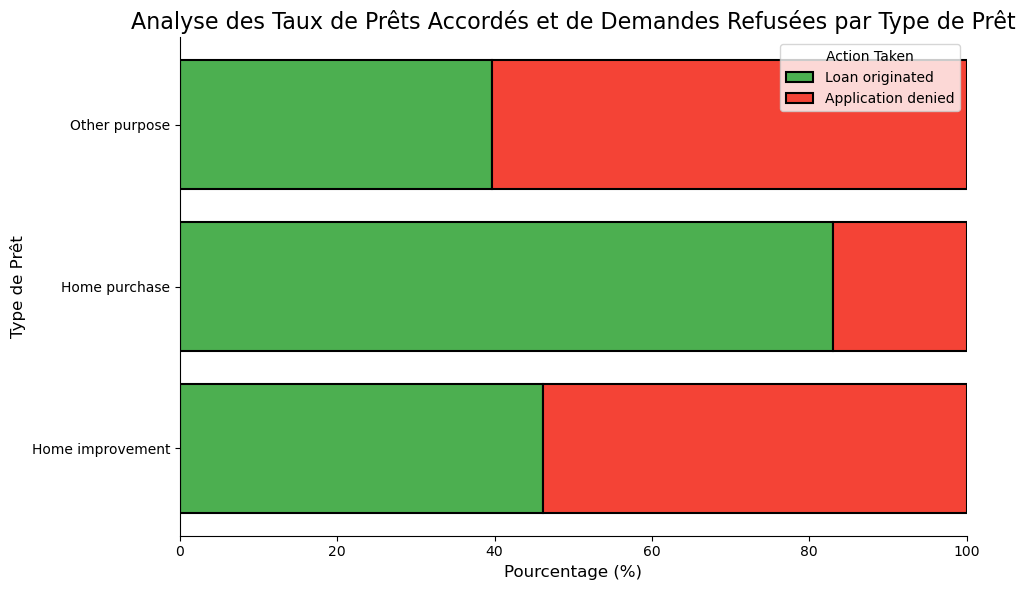

In [28]:
plot_loan_action_analysis(filepath)

Plus de 80 % des demandes de prêts pour l'achat de logements ont été acceptées, indiquant un risque perçu plus faible par les prêteurs. En revanche, environ 40% des demandes pour des prêts d'amélioration de l'habitat ont été acceptées, suggérant un risque plus élevé. Cela souligne l'importance du type de projet dans l'évaluation des demandes de crédit.

## lien_status : une variable importante pour la prise de décision


In [29]:
def plot_lien_status_analysis(df):
  # Charger les données
  state_TX = df.copy()
  # Remapper les valeurs de 'action_taken'
  action_mapping = {1: 'Loan originated', 3: 'Application denied'}
  state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

  # Remapper les valeurs de 'lien_status'
  lien_status_mapping = {1: 'Secured by a first lien', 2: 'Secured by a subordinate lien'}
  state_TX['lien_status_desc'] = state_TX['lien_status'].map(lien_status_mapping)

  # Filtrer les données pour les actions pertinentes
  filtered_data = state_TX[state_TX['action_taken_desc'].isin(['Loan originated', 'Application denied'])]

  # Calculer le pourcentage par lien_status
  lien_status_percentage = filtered_data.groupby(['lien_status_desc', 'action_taken_desc']).size().unstack(fill_value=0)
  lien_status_percentage = lien_status_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

  # Créer la figure et les axes
  fig, ax = plt.subplots(figsize=(8, 5))

  # Graphique pour lien_status
  lien_status_bars = ax.barh(
      lien_status_percentage.index,
      lien_status_percentage['Loan originated'],
      color='#87CEEB',
      edgecolor='black',
      linewidth=1.5,
      label='Loan originated'
  )

  # Ajouter les barres pour les demandes refusées
  ax.barh(
      lien_status_percentage.index,
      lien_status_percentage['Application denied'],
      left=lien_status_percentage['Loan originated'],
      color='#4682B4',
      edgecolor='black',
      linewidth=1.5,
      label='Application denied'
  )

  # Configurer le graphique
  ax.set_title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Statut de Lien', fontsize=16)
  ax.set_xlabel('Pourcentage (%)', fontsize=12)
  ax.set_ylabel('Statut de Lien', fontsize=12)
  ax.legend(title='Action Taken')
  plt.xlim(0, 100)  # Limiter l'axe des x à 100%

  # Afficher le graphique
  sns.despine()
  plt.tight_layout()
  plt.show()
  pass

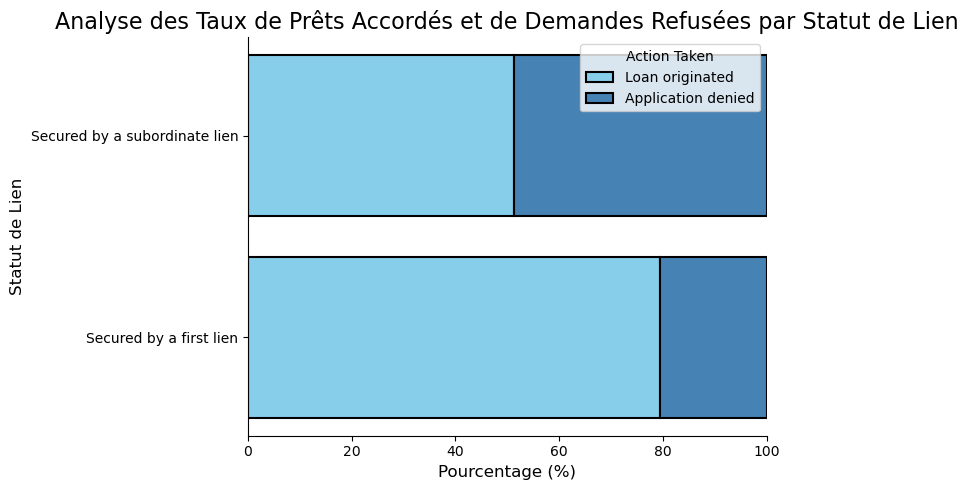

In [30]:
plot_lien_status_analysis(df)

Le taux d'acceptation des crédits diffère significativement entre les prêts de premier lien et les prêts subordonnés. Les prêts de premier lien sont généralement considérés comme moins risqués pour les prêteurs, car ils ont la priorité sur les actifs en cas de défaut de paiement.

## Existe-t-il des Biais Discriminatoires dans l'Octroi de Prêts en Fonction de la Race et de l'Éthnicité ?


In [36]:
def rename_variables(df):
    """ map action_taken, derived_sex, and derived_ethnicity."""
    state_TX = df.copy()

    # Remapper les valeurs de 'action_taken'
    action_mapping = {
        1: 'Loan originated',
        2: 'Application approved but not accepted',
        3: 'Application denied',
        4: 'Application withdrawn by applicant',
        5: 'File closed for incompleteness',
        6: 'Purchased loan',
        7: 'Preapproval request denied',
        8: 'Preapproval request approved but not accepted'
    }
    state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

    # Remapper les valeurs de 'derived_sex'
    sex_mapping = {
        'Male': 'Male',
        'Female': 'Female',
        'Joint': 'Not Available',
        'Sex Not Available': 'Not Available'
    }
    state_TX['derived_sex_desc'] = state_TX['derived_sex'].map(sex_mapping)

    # Remapper les valeurs de 'derived_ethnicity'
    ethnicity_mapping = {
        'Hispanic or Latino': 'Hispanic',
        'Not Hispanic or Latino': 'Not Hispanic',
        'Joint': 'Not Available',
        'Ethnicity Not Available': 'Not Available',
        'Free Form Text Only': 'Not Available'
    }
    state_TX['derived_ethnicity_desc'] = state_TX['derived_ethnicity'].map(ethnicity_mapping)

    return state_TX

def plot_sex_distribution(data, ax):
    """Plot loan distribution by sex."""
    filtered_data = data[data['action_taken_desc'].isin(['Loan originated', 'Application denied'])]
    sex_percentage = filtered_data.groupby(['derived_sex_desc', 'action_taken_desc']).size().unstack(fill_value=0)
    sex_percentage = sex_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

    bars = ax.bar(sex_percentage.index, sex_percentage['Loan originated'], color='#FF9999', edgecolor='black', linewidth=1.5, label='Loan originated')
    ax.bar(sex_percentage.index, sex_percentage['Application denied'], bottom=sex_percentage['Loan originated'], color='#66B2FF', edgecolor='black', linewidth=1.5, label='Application denied')
    ax.set_title('Par Sexe', fontsize=14)
    ax.set_ylabel('Pourcentage (%)', fontsize=12)
    ax.legend(title='Action Taken', loc='upper right')
    ax.bar_label(bars)



def plot_ethnicity_distribution(data, ax):
  """Plot loan distribution by ethnicity."""
  ethnicity_percentage = data.groupby(['derived_ethnicity_desc', 'action_taken_desc']).size().unstack(fill_value=0)
  ethnicity_percentage = ethnicity_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

  bars = ax.bar(ethnicity_percentage.index, ethnicity_percentage['Loan originated'], color='#FFB3E6', edgecolor='black', linewidth=1.5, label='Loan originated')
  ax.bar(ethnicity_percentage.index, ethnicity_percentage['Application denied'], bottom=ethnicity_percentage['Loan originated'], color='#B3B3FF', edgecolor='black', linewidth=1.5, label='Application denied')
  ax.set_title('Par Ethnicité', fontsize=14)
  ax.set_xlabel('Ethnicité', fontsize=12)
  ax.set_ylabel('Pourcentage (%)', fontsize=12)
  ax.legend(title='Action Taken', loc='upper right')
  ax.bar_label(bars)
  pass


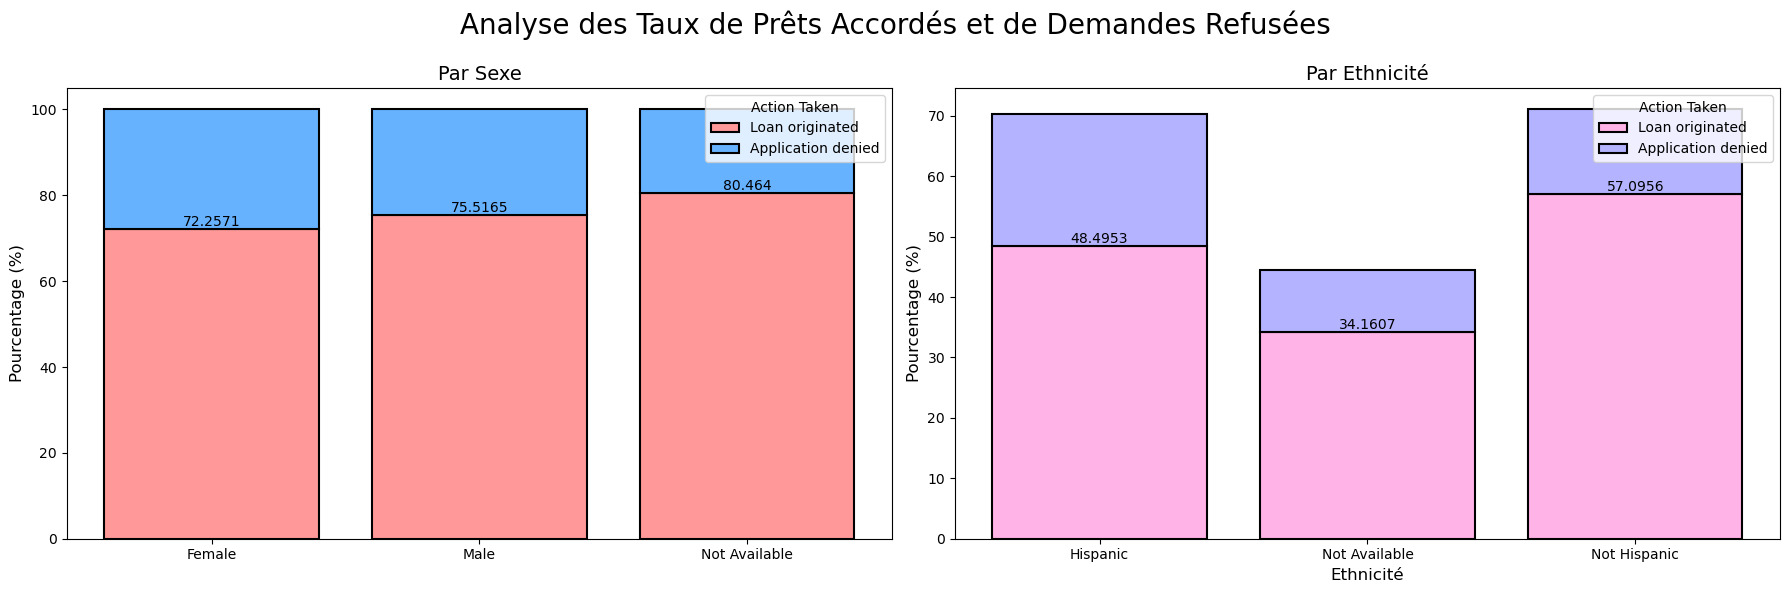

In [38]:
df = rename_variables(df)
# Créer la figure et les axes
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plotting
plot_sex_distribution(df, axs[0])
plot_ethnicity_distribution(df, axs[1])

# Configuration de l'affichage
plt.tight_layout()
plt.suptitle('Analyse des Taux de Prêts Accordés et de Demandes Refusées', fontsize=20)
plt.subplots_adjust(top=0.85)  # Ajuster l'espace pour le titre
plt.show()



L'analyse des taux de prêts accordés révèle peu de différences selon le sexe, indiquant un traitement plus ou moins équitable. En revanche, des disparités significatives sont observées par ethnicité, suggérant des biais discriminatoires potentiels. Il reste à explorer d'autres variables pour déterminer si ces différences sont justifiées ou non.

## Analyse du rate_spread

In [33]:
def analyze_rate_spread_by_race(df):
    # Convertir 'rate_spread' en numérique
    df['rate_spread'] = pd.to_numeric(df['rate_spread'], errors='coerce')

    # Vérifier les valeurs NaN après conversion
    print(f'Number of NaN values in rate_spread: {df["rate_spread"].isna().sum()}')

    # Supprimer les lignes avec NaN dans 'rate_spread'
    df = df.dropna(subset=['rate_spread'])

    # Grouper par 'derived_race' et calculer la moyenne et l'écart type
    rate_spread_by_race = df.groupby('derived_race')['rate_spread'].agg(['mean', 'std']).reset_index()

    # Calculer l'erreur standard
    rate_spread_by_race['error'] = rate_spread_by_race['std'] / np.sqrt(df.groupby('derived_race')['rate_spread'].count().values)

    # Créer le graphique à barres
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x='derived_race', y='mean', data=rate_spread_by_race, palette='muted', ci=None)

    # Ajouter des barres d'erreur
    plt.errorbar(x=rate_spread_by_race['derived_race'],
                 y=rate_spread_by_race['mean'],
                 yerr=rate_spread_by_race['error'],
                 fmt='none', c='black', capsize=5)

    # Définir les titres et les étiquettes
    plt.title('Taux Moyen de Rate Spread par Race', fontsize=16)
    plt.xlabel('Race', fontsize=12)
    plt.ylabel('Rate Spread (Moyenne)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()
    pass


Number of NaN values in rate_spread: 956983


C:\Users\asent\AppData\Local\Temp\ipykernel_1184\2340598318.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(x='derived_race', y='mean', data=rate_spread_by_race, palette='muted', ci=None)


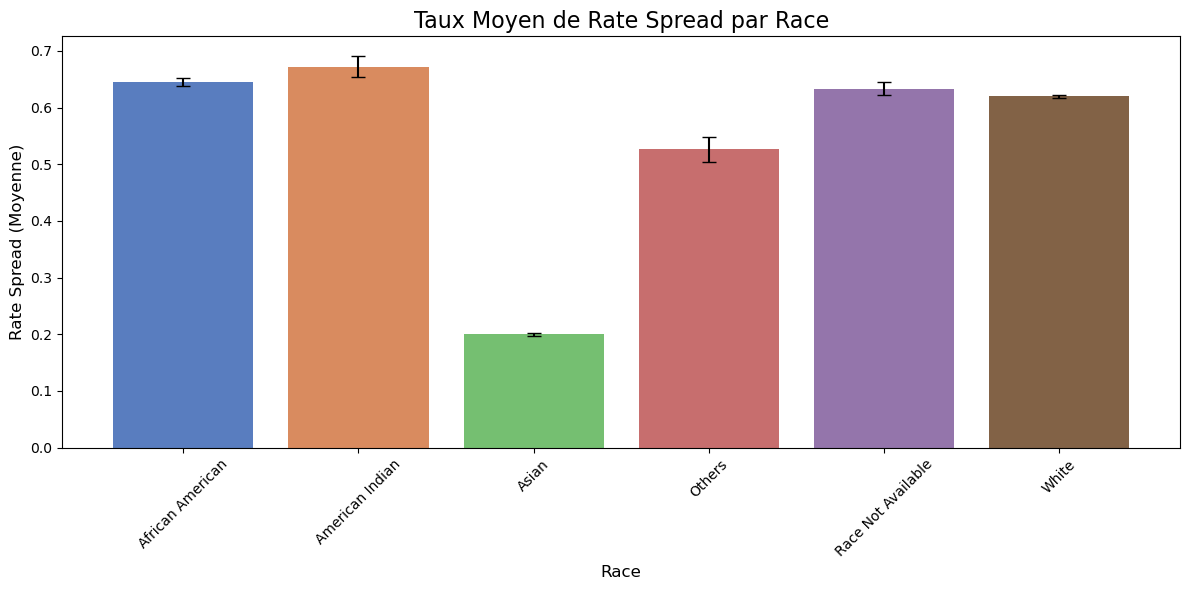

In [35]:
analyze_rate_spread_by_race(df)

Le rate spread, qui représente la différence entre le taux d'intérêt du prêt et le taux de référence, montre de grandes disparités entre les races, suggérant que certains groupes pourraient faire face à des conditions de crédit moins favorables.

# **Problème de data science**

Le dataset HMDA contient plusieurs variables explicatives de la variable cible "action_taken," que nous cherchons à modéliser dans un premier temps selon deux classes : "application denied" (demande refusée) ou "loan originated" (prêt accordé). Après une étape de sélection des variables les plus pertinentes et une combinaison avec un deuxième jeu de données présentant les taux de richesse par zones, deux approches sont envisagées :

* Classification supervisée : Nous utiliserons des algorithmes d'apprentissage supervisé basés sur les variables sélectionnées pour prédire la décision d'acceptation ou de refus de l'offre. Cette approche permettra de mieux comprendre les facteurs influençant la décision, et de détecter, après suppression des cas triviaux, la présence de biais discriminatoires potentiels dans les décisions de prêt.

* Détection d'anomalies : En complément, une seconde approche consistera à examiner le motif de décision. En utilisant des techniques de détection d'anomalies, nous chercherons à relever des incohérences ou des irrégularités dans les décisions prises, ce qui pourrait révéler des cas suspects ou des biais non explicites.

Ces deux approches nous permettront d'approfondir l'analyse des décisions et de mieux comprendre les dynamiques discriminatoires qui peuvent exister dans les décisions de prêt et donc répondre à notre problématique.





Par la suite, nous nous intéresserons à ce qui se passe lorsque le prêt est accordé, en étudiant le comportement du demandeur : pourquoi certains choisissent-ils de refuser l'offre, même après acceptation ? Cette analyse permettra de vérifier s'il existe d'autres formes de biais qui pourraient influencer la décision des demandeurs, tels que des rajouts de taux ("rate_spread") non équitables ou d'autres pratiques discriminatoires qui rendraient l'offre moins attractive, malgré l'acceptation initiale par la banque.

# Correlation des variables

In [45]:
df = pd.read_csv('small_dataset_20.csv')

In [47]:
# I 
df['interest_rate'].value_counts()

interest_rate
2.875     55643
2.75      55540
3.25      53872
3.375     40460
3.125     38320
          ...  
1.751         1
10.048        1
1.865         1
3.342         1
6.697         1
Name: count, Length: 5323, dtype: int64

c:\Users\asent\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


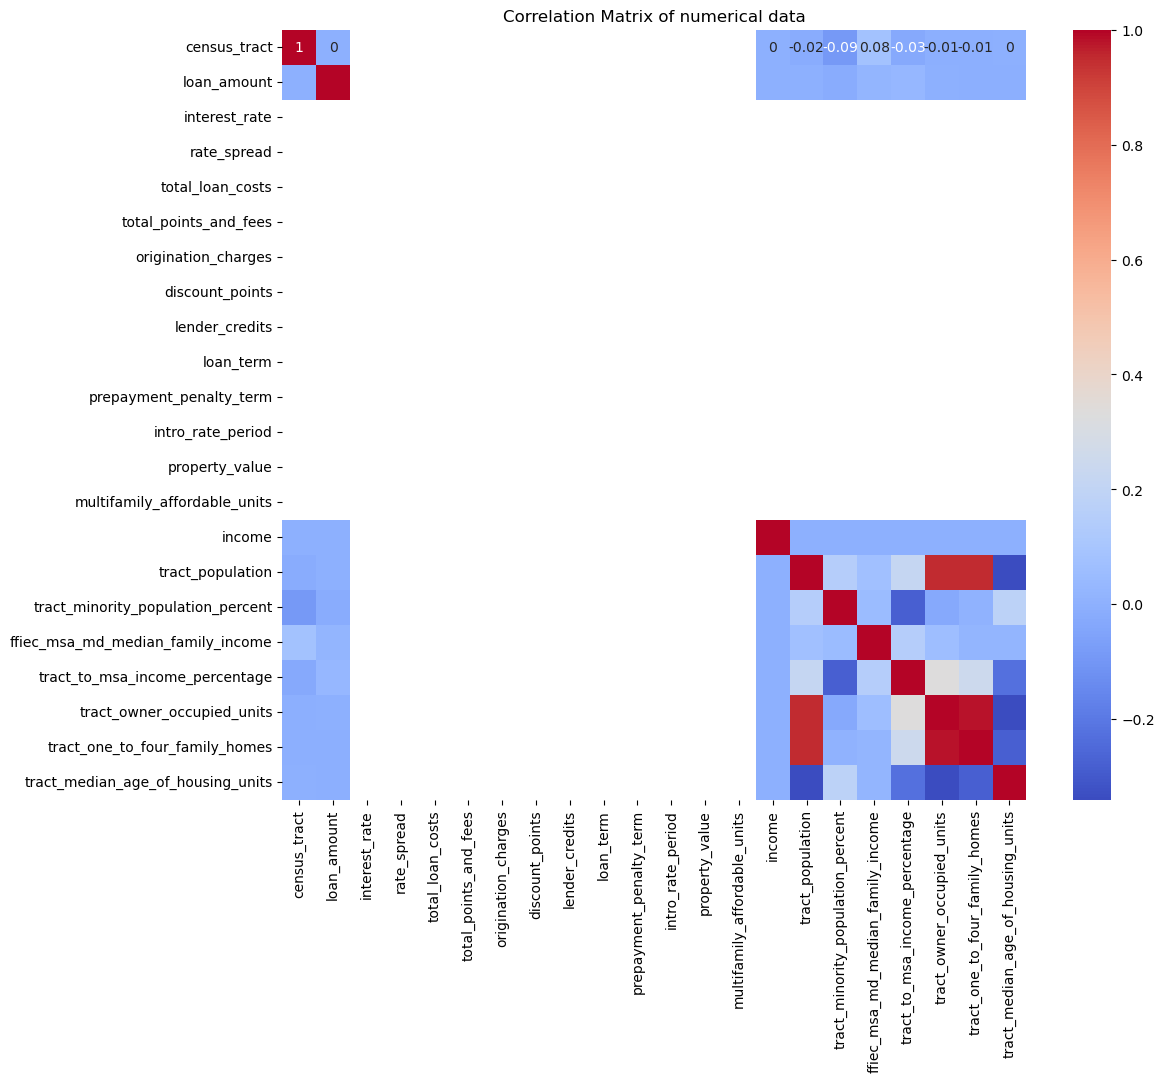

In [46]:
dfcorr=df[["census_tract","loan_amount","interest_rate","rate_spread","total_loan_costs","total_points_and_fees","origination_charges","discount_points","lender_credits","loan_term","prepayment_penalty_term","intro_rate_period","property_value","multifamily_affordable_units","income","tract_population","tract_minority_population_percent","ffiec_msa_md_median_family_income","tract_to_msa_income_percentage","tract_owner_occupied_units","tract_one_to_four_family_homes","tract_median_age_of_housing_units"]]

# change all string values in dfcorr to null value

dfcorr = dfcorr.map(lambda x: None if isinstance(x, str) else x)

corr_matrix = dfcorr.corr()

corr_matrix = corr_matrix.round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of numerical data')
plt.show()

Pour les variables numériques, on constate que la plupart d'entre elles ne présentent pas de corrélations importantes. Cependant, certaines variables sont fortement corrélées, comme le "interest rate" et le "rate spread", ce qui est normal puisque le rate spread est défini par la formule : rate spread = interest rate - APOR (average prime offer rate). D'autres corrélations fortes sont observées entre "total_points_and_fees" et "lender_credits", car les charges dépendent fortement du crédit total, ainsi qu'entre "tract_population", "tract_owner_occupied_units" et "tract_one_to_four_family_homes", car ces variables représentent des aspects similaires, tels que le nombre de personnes dans le foyer.